<a href="https://colab.research.google.com/github/michalis0/DataScience_and_MachineLearning/blob/master/Assignements/Part%203/Assignment_part_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSML investigation:

You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!

# Assignement part three
### Due 15.10.2023

We received new intelligence informing us that the rogue agent has a position with great responsibility.
Use the table "HR_Analytics.csv" to create a classifier model that predicts the job role of a person. Use this model to predict the roles of the table of suspects "suspect_HR_data.csv".

Retain only the list of suspects whose role indicates high responsibility.


## Getting to know our data

- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

In [75]:
# Import required packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/HR_Analytics.csv", index_col='Unnamed: 0')
suspects = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%203/data/suspects.csv", index_col='Unnamed: 0')


### Let's check the data


In [76]:
df.info()

# 5 first observations :
df.head()

#just checked the value of overtime : (YES/NO)
#print(df['OverTime'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   BusinessTravel            1470 non-null   object
 1   DailyRate                 1470 non-null   int64 
 2   DistanceFromHome          1470 non-null   int64 
 3   Education                 1470 non-null   int64 
 4   EmployeeCount             1470 non-null   int64 
 5   EmployeeNumber            1470 non-null   int64 
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobSatisfaction           1470 non-null   int64 
 12  MonthlyIncome             1470 non-null   int64 
 13  MonthlyRate               1470 non-null   int64 
 14  NumCompaniesWorked      

,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,1,2,1,1,2,Female,94,3,...,1,80,0,8,0,1,6,4,0,5
1,Travel_Frequently,279,8,1,1,2,3,Male,61,2,...,4,80,1,10,3,3,10,7,1,7
2,Travel_Rarely,1373,2,2,1,4,4,Male,92,2,...,2,80,0,7,3,3,0,0,0,0
3,Travel_Frequently,1392,3,4,1,5,4,Female,56,3,...,3,80,0,8,3,3,8,7,3,0
4,Travel_Rarely,591,2,1,1,7,1,Male,40,3,...,4,80,1,6,3,3,2,2,2,2


In [77]:
#JUST SOME ADDITIONAL TESTS TO MAKE SURE EVERYTHING IS CORRECT IN MY PIPELINE FUNCTION
#commented it otherwise it will be too messy.

#OHE_businesstr = OneHotEncoder()
#train_BT = OHE_businesstr.fit_transform(df[['BusinessTravel']])
#df_train = pd.concat([df.drop(columns=['BusinessTravel']), pd.DataFrame(train_BT.toarray(), columns=OHE_businesstr.get_feature_names_out(['BusinessTravel']))], axis=1)
#df_train

#LE_gender = LabelEncoder()
#df['Gender'.$.] = LE_gender.fit_transform(df['Gender'])
#df.shape
#df.head()

## 1. Define a pipeline that encodes features as follows:

* Use one-hot encoding for `BusinessTravel`
* Use label encoding for `Gender`, `OverTime` and `BusinessTravel`


In [78]:
def pipeline(train: pd.DataFrame, test: pd.DataFrame):

    #I had to reset the indexes as mentionned on the slack because i had a small problem :
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)

    # Apply OneHotEncoding over the 'BusinessTravel' feature fitted on the train dataset and transform on both train and test datasets

    OHE_businesstr = OneHotEncoder()
    train_BT = OHE_businesstr.fit_transform(train[['BusinessTravel']])
    test_BT = OHE_businesstr.transform(test[['BusinessTravel']])

    # Apply a Label Encoder over the 'Gender' feature fitted on the train dataset and transform on both train and test datasets

    LE_gender = LabelEncoder()
    train['Gender'] = LE_gender.fit_transform(train['Gender'])
    test['Gender'] = LE_gender.transform(test['Gender'])

    # Apply a Label Encoder over the 'Overtime' feature fitted on the train dataset and transform on both train and test datasets

    LE_overtime = LabelEncoder()
    train['OverTime'] = LE_overtime.fit_transform(train['OverTime'])
    test['OverTime'] = LE_overtime.transform(test['OverTime'])

    # Concatenate the datasets
    df_train = pd.concat([train.drop(columns=['BusinessTravel']), pd.DataFrame(train_BT.toarray(), columns=OHE_businesstr.get_feature_names_out(['BusinessTravel']))], axis=1)
    df_test = pd.concat([test.drop(columns=['BusinessTravel']), pd.DataFrame(test_BT.toarray(), columns=OHE_businesstr.get_feature_names_out(['BusinessTravel']))], axis=1)

    # Apply a min max scaller fitted on the train dataset and transform both the train and the test dataset
    sc = MinMaxScaler()
    df_train = sc.fit_transform(df_train)
    df_test = sc.transform(df_test)

    return df_train, df_test

### 1.1 Define your dependent variable y ("JobLevel") and your independent features X

In [79]:
features = ['BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
target = ["JobLevel"]

#defining the independent features X :
X = df[features]
#defining the y variable "JobLevel" (Remember : use the table "HR_Analytics.csv" to create a classifier model that predicts the job role of a person)
y = df[target]

## 2. Logistic Regression

In this section we will use logistic regression to predict the JobLevel of the potential suspects.

To do so you can reuse the pipeline created in part 1.

#### 2.1 Use logistic regression to predict the `JobLevel` based on all variables over the test set.
You can use a test_size of 0.2 and random a random state of 42
(use logistic regression with the lbfgs solver, 5 fold cross validation and max_iter = 100)

Use only the HR analytics dataset to collect accurate insight on the model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating the logistic regression model :
logistic_r_model = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=100)

#encode the data :
encoded_X_train, encoded_X_test = pipeline(X_train, X_test)

#checking the new encoded dataset
#display(encoded_X_train.head())
print(encoded_X_train.shape)
print(encoded_X_test.shape)

#training the model
logistic_r_model.fit(encoded_X_train, y_train)

#predicting the y value
y_test_pred = logistic_r_model.predict(encoded_X_test)
y_train_pred = logistic_r_model.predict(encoded_X_train)

(1176, 29)
(294, 29)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

#### 2.1.2 Display the confusion matrix and the other accuracy measures seen in class.


Accuracy test =  0.8299319727891157
Accuracy train =  0.9090136054421769
Precision of the LRM =  0.8336170277230723
Recall of the LRM =  0.801127697783002


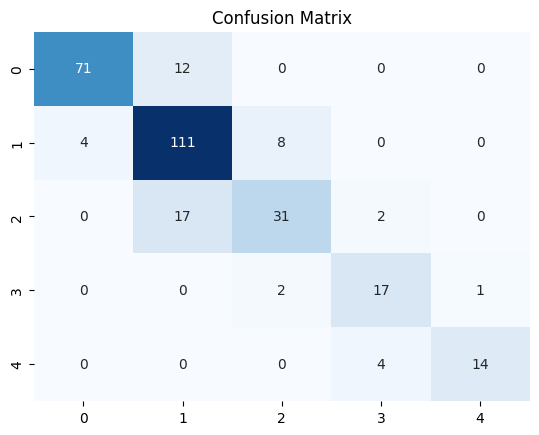

In [81]:
# creating the confusion matrix :
c_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')

# print(c_matrix)

# accuracy measures (accuracy, precision and recall) :
acc_test = accuracy_score(y_test, y_test_pred)
acc_train = accuracy_score(y_train, y_train_pred)
precision_lr = precision_score(y_test, y_test_pred, average='macro') #if i dont put something after average i get an error
recall_lr = recall_score(y_test, y_test_pred, average='macro') #same here

# display everything
print("Accuracy test = ", acc_test)
print("Accuracy train = ", acc_train)
print("Precision of the LRM = ", precision_lr)
print("Recall of the LRM = ", recall_lr)
plt.show()

#### 2.2 Predicting suspects Job Level
Retrain a logistic regression model on the **full train dataset** and predict the JobLevel of the suspects. (do not forget to apply the pipeline)

Training on part of the dataset is mainly usefull so that we get an idea of the results we should expect but also performing various optimisations.

In order to get the best result possible it is advised to retrain on the entire set prior to making predictions.

(use logistic regression with the lbfgs solver, 5 fold cross validation and max_iter = 100)

In [82]:
#defining the independent features X for suspects:
X_sus = suspects.drop(columns=['userID'])

# checking how is the database
suspects.head()

,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,1,80,0,8,0,1,6,4,0,5
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,4,80,1,10,3,3,10,7,1,7
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,2,80,0,7,3,3,0,0,0,0
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,3,80,0,8,3,3,8,7,3,0
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,4,80,1,6,3,3,2,2,2,2


In [83]:
X_encoded, X_encoded_sus = pipeline(X, X_sus)

new_logistic_model = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=100)

new_logistic_model.fit(X_encoded, y)

suspects["JobLevel_LogisticRegression"] = new_logistic_model.predict(X_encoded_sus)

display(suspects)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel_LogisticRegression
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,80,0,8,0,1,6,4,0,5,2
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,80,1,10,3,3,10,7,1,7,2
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,80,0,7,3,3,0,0,0,0,1
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,80,0,8,3,3,8,7,3,0,1
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,80,1,6,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,458293,Travel_Rarely,1206,17,1,1,1009,4,Female,41,...,80,2,5,6,3,4,2,3,2,2
725,218415,Travel_Rarely,622,14,4,1,1010,3,Male,39,...,80,1,5,2,1,4,2,0,2,1
726,173906,Travel_Frequently,853,1,1,1,1011,3,Female,96,...,80,1,4,1,3,4,3,0,3,1
727,178685,Non-Travel,287,5,2,1,1012,2,Male,73,...,80,0,0,2,3,0,0,0,0,1


## 3. Decision tree

In this section we will use the decision tree model to predict the JobLevel of the potential suspects.

To do so you can reuse the pipeline created in part 1.

#### 3.1 Use Decision Tree classifier to predict the JobLevel based on all variables.
You can use a test_size of 0.2 and random a random state of 42

The max depth for the decision tree can be 5


Use only the HR analytics dataset to collect accurate insight on the model

In [84]:
# creating the split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#encoding the data :
encoded_X_train, encoded_X_test = pipeline(X_train, X_test)

# creating the decision tree classifier :
decision_tree = DecisionTreeClassifier(max_depth=5)

# train the model on the training data
decision_tree.fit(encoded_X_train, y_train)

# make predictions on the test data
y_pred = decision_tree.predict(encoded_X_test)

#predicting the y value
y_test_pred = decision_tree.predict(encoded_X_test)
y_train_pred = decision_tree.predict(encoded_X_train)

#### 3.1.2 Display the confusion matrix and the other accuracy measures seen in class.


Accuracy test =  0.9149659863945578
Accuracy train =  0.9319727891156463
Precision of the Decision Tree =  0.9260767960668259
Recall of the Decision Tree =  0.9172106964443139


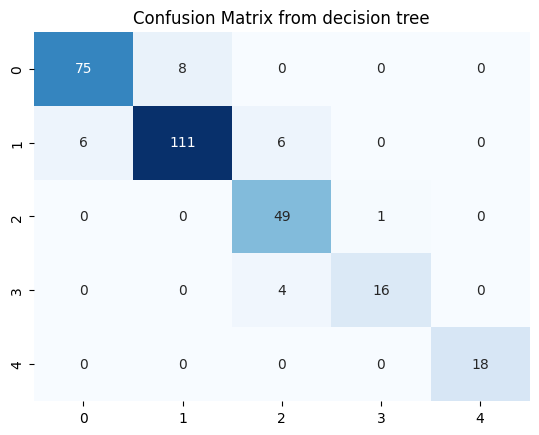

In [85]:
# creating the confusion matrix :
c_matrix_dt = confusion_matrix(y_test, y_test_pred)
sns.heatmap(c_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix from decision tree')

# accuracy measures (accuracy, precision and recall) :
acc_test_dt = accuracy_score(y_test, y_test_pred)
acc_train_dt = accuracy_score(y_train, y_train_pred)
precision_dt = precision_score(y_test, y_test_pred, average='macro') #if i dont put something after average i get an error
recall_dt = recall_score(y_test, y_test_pred, average='macro') #same here

# display everything
print("Accuracy test = ", acc_test_dt)
print("Accuracy train = ", acc_train_dt)
print("Precision of the Decision Tree = ", precision_dt)
print("Recall of the Decision Tree = ", recall_dt)
plt.show()


#### 3.2 Predicting suspects Job Level according to the decision tree
Retrain a decision tree model on the full train dataset and predict the JobLevel of the suspects.

Training on part of the dataset is mainly usefull so that we get an idea of the results we should expect but also performing various optimisations.

In order to get the best result possible it is advised to retrain on the entire set prior to making predictions.

The max depth for the decision tree can be 5

In [86]:
X_encoded, X_encoded_sus = pipeline(X, X_sus)

new_decision_tree = DecisionTreeClassifier(max_depth=5)

new_decision_tree.fit(X_encoded, y)

suspects["JobLevel_DecisionTree"] = new_decision_tree.predict(X_encoded_sus)

display(suspects)


,userID,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel_LogisticRegression,JobLevel_DecisionTree
0,317991,Travel_Rarely,1102,1,2,1,1,2,Female,94,...,0,8,0,1,6,4,0,5,2,2
1,241892,Travel_Frequently,279,8,1,1,2,3,Male,61,...,1,10,3,3,10,7,1,7,2,2
2,303376,Travel_Rarely,1373,2,2,1,4,4,Male,92,...,0,7,3,3,0,0,0,0,1,1
3,761992,Travel_Frequently,1392,3,4,1,5,4,Female,56,...,0,8,3,3,8,7,3,0,1,1
4,373318,Travel_Rarely,591,2,1,1,7,1,Male,40,...,1,6,3,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,458293,Travel_Rarely,1206,17,1,1,1009,4,Female,41,...,2,5,6,3,4,2,3,2,2,2
725,218415,Travel_Rarely,622,14,4,1,1010,3,Male,39,...,1,5,2,1,4,2,0,2,1,1
726,173906,Travel_Frequently,853,1,1,1,1011,3,Female,96,...,1,4,1,3,4,3,0,3,1,2
727,178685,Non-Travel,287,5,2,1,1012,2,Male,73,...,0,0,2,3,0,0,0,0,1,1


## 4. kNN

In this section we will use the kNN model to predict the JobLevel of the potential suspects.

To do so you can reuse the DataFrame created in part 1.

#### 4.1. Use `GridSearchCV` from *sklearn.model_selection* to find the best value of `k` that should be used for the K-Nearest Neighbours (KNN) algorithm.


*   Use a range value of hyperparmeter `k` from 1 to 8. This range is a parameter used by the `GridSearchCV` to define the best value of `k`.
*   Set the cross-validation to 5 folds.
*   Set `scoring='accuracy', 'return_train_score=False', verbose=1

In [87]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# reusing the pipeline
X_train_encoded, X_test_encoded = pipeline(X_train, X_test)

In [88]:
# creating a dictionnary with values 1-8
k = {'n_neighbors': list(range(1, 9))}

# checking that everything is correct :
print(k)

# creating the knn model
knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_model, param_grid=k, scoring='accuracy', cv=5, return_train_score=False, verbose=1)

# training the model
grid_search.fit(X_train_encoded, y_train)

y_pred = grid_search.predict(X_test_encoded)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [89]:
# Find the best parameters
best_p = grid_search.best_params_
print(best_p)

{'n_neighbors': 5}


In [90]:
# What is the best score?
best_sc = grid_search.best_score_
print(best_sc)

0.46596826541651637


In [91]:
# Evaluate the model
best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test_encoded, y_test)
precision_knn = precision_score(y_test, y_pred, average='macro')

print("The accuracy = ", test_accuracy)
print("The precision = ", precision_knn)

# As the model is not so good we will not continue the tests with this one.

The accuracy =  0.4489795918367347
The precision =  0.420341589768496


## 5. Remaining suspects

In this section we will identify the potential suspects  according to our new intelligence.

Identify which users have a JobRole of 4 or higher on **both** the **Linear regression** model and the **Decision Tree**

In [92]:
remaining_suspects = suspects[(suspects["JobLevel_DecisionTree"] >= 4) & (suspects["JobLevel_LogisticRegression"] >= 4)]

for userID in [774730, 531937, 925217, 880689]: # the users that have been given in the moodle
    if userID in remaining_suspects["userID"].values:
        print(userID)

531937
925217
